In [1]:
import pandas as pd

PRED_CSV1 = './baseline/mmdetection/work_dirs/retinanet_effb3_fpn_crop896_8x4_1x_coco_trash/submission_latest.csv'
PRED_CSV2 = './baseline/mmdetection/work_dirs/retinanet_effb3_fpn_crop896_8x4_1x_coco_trash/submission_latest_epoch24.csv'
PRED_CSV3 = './baseline/mmdetection/work_dirs/faster_rcnn_r50_fpn_1x_trash/submission_latest.csv'
PRED_CSV4 = './baseline/faster_rcnn/faster_rcnn_scratch_submission.csv'
PRED_CSV5 = './baseline/faster_rcnn/faster_rcnn_torchvision_submission.csv'
PRED_CSV6 = './effdet_tr/submission_50.csv'
PRED_CSV7 = './baseline/mmdetection/work_dirs/retinanet_effb3_fpn_crop896_8x4_1x_coco_trash/submission_latest_epoch24.csv'
PRED_CSV8 = './submission_ensemble.csv'
PRED_CSV9 = './baseline/faster_rcnn/faster_rcnn_torchvision_submission_b20_lr0005_adamW_e50.csv'
PRED_CSV10 = './YOLO/yolo_submission.csv'
PRED_CSV11 = './baseline/faster_rcnn/faster_rcnn_torchvision_dataset2.csv'
PRED_CSV12 = './FasterRCNN_e40.csv'
PRED_CSV13 = './FasterRCNN_e52.csv'
PRED_CSV14 = './FasterRCNN_e215_norm.csv'
PRED_CSV15 = './FasterRCNN_e215_norm.csv'
PRED_CSV16 = './eff_kfold1_896.csv'
PRED_CSV17 = './eff_kfold2_896.csv'
PRED_CSV18 = './eff_kfold3_896.csv'
PRED_CSV19 = './kfold_ensemble.csv'
PRED_CSV20 = './yolo7.csv'
PRED_CSV21 = './kfold_ensemble_896.csv'
PRED_CSV22 = './eff_kfold1_1024.csv'
PRED_CSV23 = './eff_kfold2_1024_e40.csv'
PRED_CSV24 = './eff_kfold2_1024_e40_l005.csv'
PRED_CSV25 = './ensemble_5.csv'

LABEL_NAME = ["General trash", "Paper", "Paper pack", "Metal", 
              "Glass", "Plastic", "Styrofoam", "Plastic bag", "Battery", "Clothing"]

# # load ground truth
# with open(GT_JSON, 'r') as outfile:
#     test_anno = (json.load(outfile))

# load prediction
pred_df = pd.read_csv(PRED_CSV1)
pred_df2 = pd.read_csv(PRED_CSV2)
pred_df3 = pd.read_csv(PRED_CSV3)
pred_df4 = pd.read_csv(PRED_CSV4)
pred_df5 = pd.read_csv(PRED_CSV5)
pred_df6 = pd.read_csv(PRED_CSV6)
pred_df7 = pd.read_csv(PRED_CSV7)
pred_df8 = pd.read_csv(PRED_CSV8)
pred_df9 = pd.read_csv(PRED_CSV9)
pred_df10 = pd.read_csv(PRED_CSV10)
pred_df11 = pd.read_csv(PRED_CSV11)
pred_df12 = pd.read_csv(PRED_CSV12)
pred_df13 = pd.read_csv(PRED_CSV13)
pred_df14 = pd.read_csv(PRED_CSV14)
pred_df15 = pd.read_csv(PRED_CSV15)
pred_df16 = pd.read_csv(PRED_CSV16)
pred_df17 = pd.read_csv(PRED_CSV17)
pred_df18 = pd.read_csv(PRED_CSV18)
pred_df19 = pd.read_csv(PRED_CSV19)
pred_df20 = pd.read_csv(PRED_CSV20)
pred_df21 = pd.read_csv(PRED_CSV21)
pred_df22 = pd.read_csv(PRED_CSV22)
pred_df23 = pd.read_csv(PRED_CSV23)
pred_df24 = pd.read_csv(PRED_CSV24)
pred_df25 = pd.read_csv(PRED_CSV25)

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from matplotlib.pyplot import cm

def showBox(pred_df):
    COLORS = np.random.uniform(0, 255, size=(len(LABEL_NAME), 3))

    for i, img_path in enumerate(pred_df['image_id']):
        pred = pred_df['PredictionString'].iloc[i]
        img = plt.imread('./dataset/'+img_path)

        arr = pred.split(' ')
        for idx in range(0, len(arr), 6):
            try:
                # print(arr)
                label_index = int(arr[idx])
                confidence_score = float(arr[idx+1])
                x_min = int(round(float(arr[idx+2]),1))
                y_min = int(round(float(arr[idx+3]),1))
                x_max = int(round(float(arr[idx+4]),1))
                y_max = int(round(float(arr[idx+5]),1))

                print(label_index, confidence_score, x_min, x_max, y_min, y_max)
                if confidence_score > 0.0:
                    # cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
                    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), COLORS[label_index], 2)

                    y = y_min - 15 if y_min - 15 > 15 else y_min + 15
                    label = "{}: {:.2f}%".format(str(LABEL_NAME[label_index]), confidence_score * 100)
                    # cv2.putText(img, label, (x_min, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
                    cv2.putText(img, label, (x_min, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[label_index], 2)
            except Exception as e:
                print('exception:', e)

        # cv2.rectangle(img, (startX, startY), (endX, endY), (255, 0, 0), 2)
        plt.figure(figsize=(8,8))
        plt.imshow(img)
        plt.show()
        if i>5: break

7 0.95678425 221 455 51 465
7 0.9402705 120 328 427 725
7 0.8622295 606 954 518 1015
7 0.7996871 448 643 600 872
7 0.7583148 388 597 189 543
1 0.7339102 565 757 102 359
7 0.71855456 256 430 424 580
5 0.6774467 343 396 642 727
7 0.6562447 576 876 337 621
7 0.42280006 559 710 350 580
7 0.4164368 312 474 545 747
1 0.34170285 168 250 360 449
5 0.33770016 312 474 545 747
5 0.32941 359 450 555 640
5 0.32701817 328 353 640 683
6 0.3093789 244 301 685 749
1 0.30116078 436 574 432 677
5 0.2960726 398 452 620 690
2 0.29533437 676 727 259 316
5 0.2865978 386 424 686 721
5 0.2778397 322 385 569 621
5 0.26882574 336 424 562 626
7 0.26664716 347 457 553 688
7 0.26517937 472 564 555 656
1 0.24966499 245 291 410 475
1 0.24688008 640 734 136 321
2 0.24496233 327 353 640 682
1 0.2406639 677 729 260 317
5 0.23467977 316 468 665 742
1 0.22775385 54 160 453 622
1 0.2264434 472 564 555 656
7 0.22558771 436 574 432 677
5 0.22226222 244 301 685 749
7 0.21999924 455 807 344 673
7 0.21472558 322 384 567 621
7 0

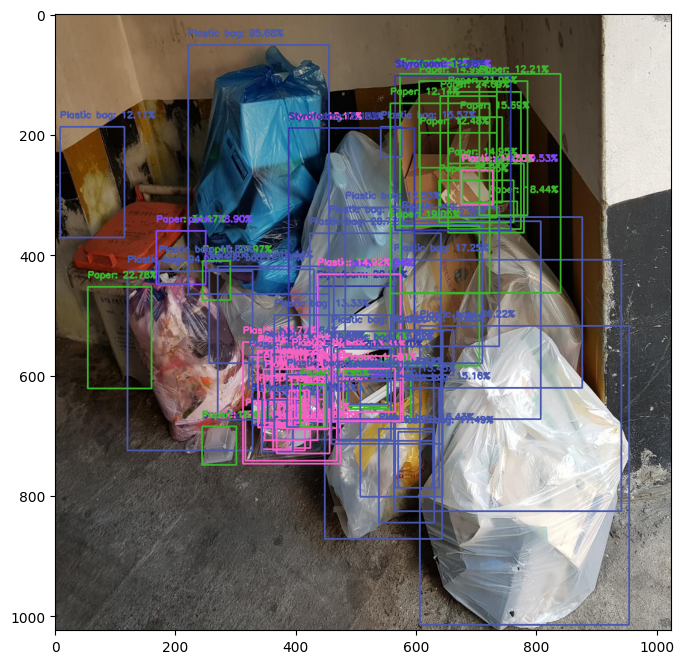

5 0.79847085 132 486 0 267
3 0.7266118 353 749 251 696
6 0.4586122 760 899 669 986
1 0.22601247 763 898 668 987
5 0.2156529 342 750 253 693
4 0.17625608 353 749 251 696
8 0.14971206 347 753 255 689
4 0.13699843 132 486 0 267
2 0.11648246 763 898 670 989
7 0.11552481 763 898 668 987
9 0.10046122 762 899 666 984
2 0.08777746 342 750 255 680
6 0.08184746 951 996 792 824
5 0.0787426 761 897 661 979
7 0.07676879 130 488 1 269
3 0.06049624 132 486 0 267
6 0.05650775 770 874 671 844
6 0.056487463 660 929 646 1032
exception: invalid literal for int() with base 10: ''


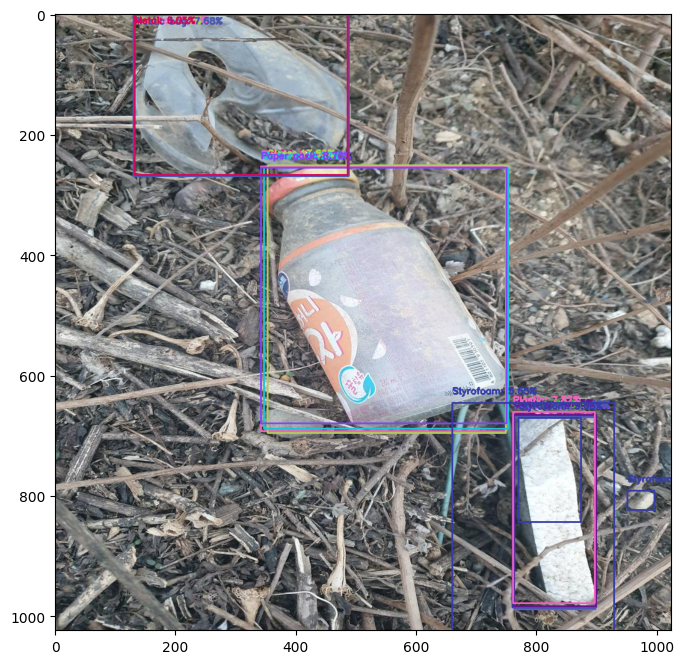

1 0.7547096 305 1014 245 720
1 0.680807 76 426 270 607
1 0.6111939 772 1024 438 1019
4 0.58442014 869 914 243 324
1 0.485813 428 646 268 330
1 0.41064212 758 953 232 332
1 0.40715516 687 1020 220 341
1 0.3332684 328 859 398 739
1 0.2981501 2 147 242 436
1 0.29602376 409 805 518 732
7 0.29126644 668 867 222 324
1 0.27647567 674 874 222 324
1 0.26564568 958 1023 231 365
7 0.2560413 666 1009 217 340
1 0.22318889 974 1025 229 247
5 0.22048047 758 953 232 332
7 0.1961967 433 644 268 327
1 0.19551258 338 1027 347 986
7 0.18200389 743 925 230 327
1 0.18008389 961 1021 301 369
5 0.16896857 869 914 243 324
1 0.15724634 993 1024 308 391
1 0.15530553 659 734 289 323
2 0.15319915 75 423 267 605
1 0.15030646 1 152 236 333
1 0.14979927 427 1008 344 628
1 0.14975503 455 879 436 655
5 0.14914995 674 874 222 324
7 0.1447458 659 734 289 323
7 0.14373091 974 1025 229 247
5 0.14099576 691 1012 224 347
1 0.14058973 5 283 250 465
5 0.12412139 974 1025 229 247
4 0.12151443 828 930 235 330
5 0.12024866 659 73

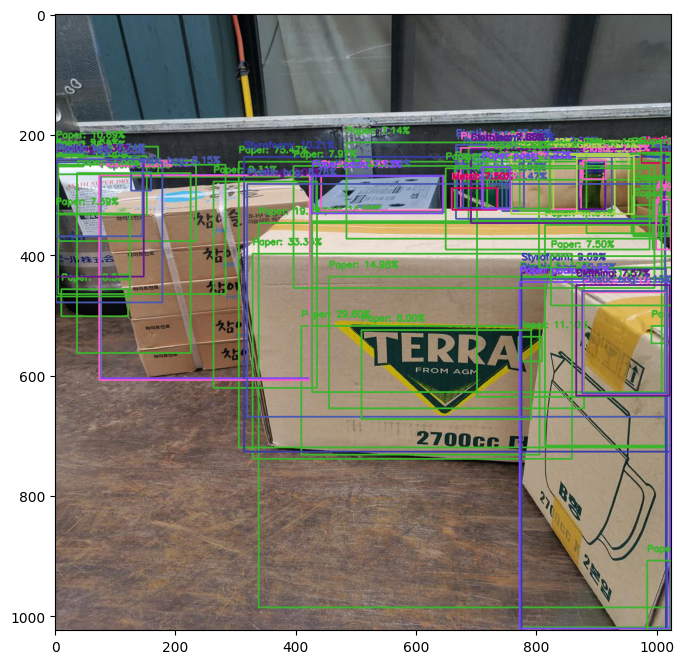

9 0.75166994 142 912 252 819
9 0.27298027 16 1001 -1 598
9 0.168522 -14 979 437 1017
9 0.15991971 6 282 444 963
5 0.118616514 161 930 264 819
9 0.11817253 8 176 447 872
7 0.10815206 142 912 252 819
9 0.10276805 -1 432 64 918
9 0.10053675 92 1004 702 1009
4 0.07903131 142 912 252 819
9 0.07462034 229 1003 6 323
8 0.07135692 121 934 238 812
9 0.0673843 87 499 184 765
9 0.05650172 518 934 212 783
9 0.056025106 42 288 732 1024
9 0.056003314 1 492 18 538
9 0.05272476 439 1006 5 199
exception: invalid literal for int() with base 10: ''


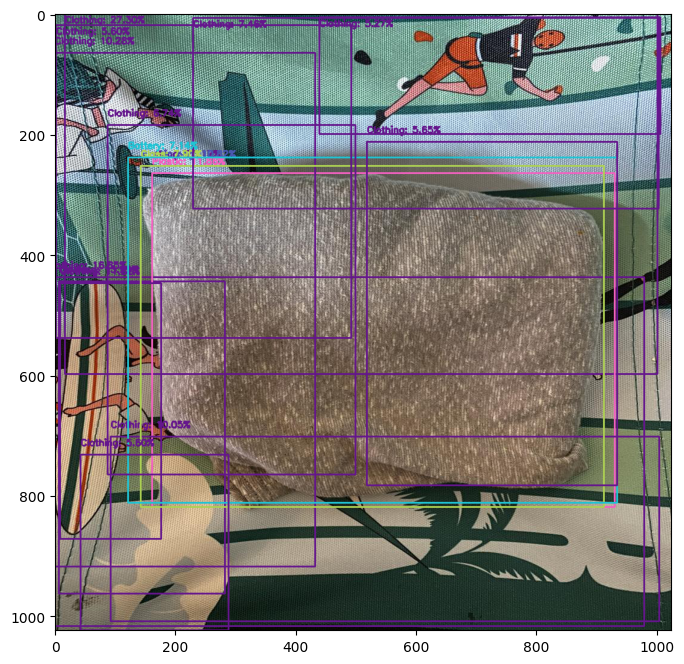

7 0.32814103 184 875 244 782
7 0.20197766 738 870 491 570
6 0.19810337 426 491 510 577
1 0.18149653 185 864 244 778
1 0.15383196 400 497 730 777
7 0.13384564 404 853 408 745
7 0.119046055 435 656 412 570
9 0.10348473 433 657 411 567
1 0.09083995 365 877 414 772
7 0.08431821 427 491 511 576
9 0.08298253 227 874 293 769
1 0.078060485 427 654 409 571
7 0.065424554 391 802 385 611
1 0.06512557 308 644 401 724
6 0.063609086 431 548 508 576
7 0.06303268 426 492 731 770
7 0.061541125 279 672 408 760
1 0.05819885 427 496 510 576
1 0.05740594 738 869 493 571
1 0.054673593 391 802 385 611
5 0.053088654 738 870 491 570
5 0.0518379 426 492 731 770
1 0.051257946 279 668 256 605
exception: invalid literal for int() with base 10: ''


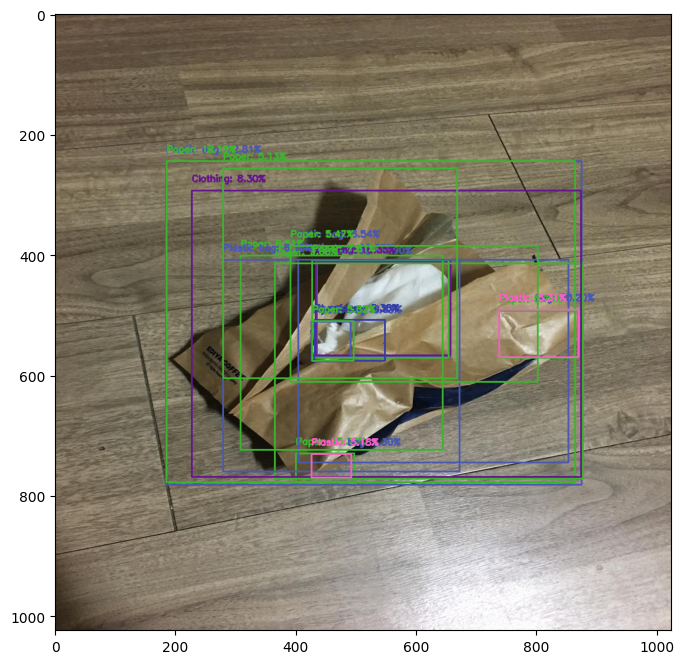

2 0.83492064 356 781 233 712
1 0.21480174 358 777 257 721
6 0.08344584 356 781 233 712
7 0.063737825 358 777 257 721
5 0.06339587 358 778 230 711
7 0.054314744 245 315 642 684
3 0.050008655 358 777 257 721
exception: invalid literal for int() with base 10: ''


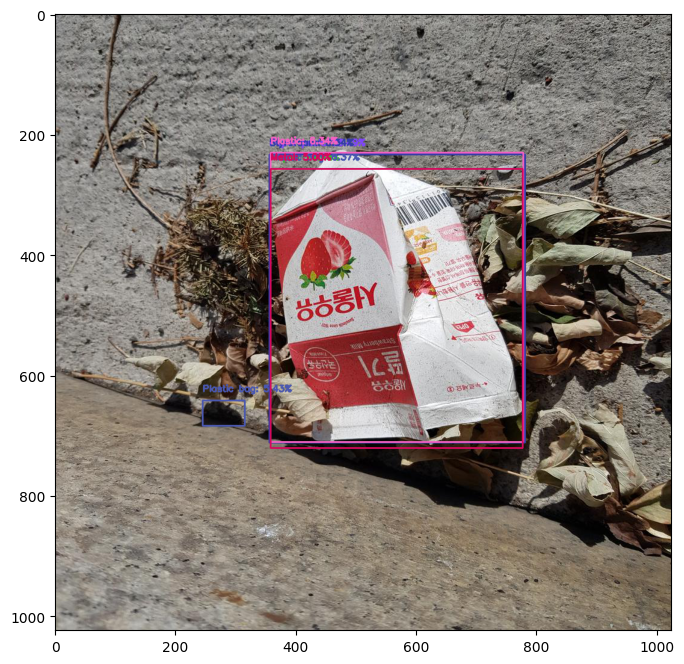

4 0.66853046 361 844 458 727
7 0.58353734 277 406 8 170
5 0.5492787 364 846 456 721
4 0.48500854 428 699 20 273
5 0.28709504 0 70 40 220
6 0.25024462 599 703 1 86
4 0.20383662 70 212 380 735
5 0.20112303 428 700 15 272
9 0.17285301 599 703 1 86
5 0.15701027 70 212 380 735
9 0.1565143 70 212 380 735
7 0.1517622 267 300 70 124
5 0.13877815 600 704 2 87
7 0.119628884 287 433 374 672
5 0.11771936 188 301 626 870
7 0.116967134 71 233 370 726
7 0.1168795 111 407 7 179
2 0.1157966 713 808 900 938
4 0.11371374 379 699 17 461
7 0.105042025 601 702 1 86
9 0.09975464 0 88 810 940
9 0.098833665 173 294 557 861
9 0.09869699 431 700 15 271
9 0.09411377 60 273 394 868
4 0.090597905 194 302 652 870
5 0.090464056 898 1025 788 915
9 0.09025496 92 270 487 733
7 0.08858417 428 700 15 272
7 0.088562146 107 426 248 811
2 0.08767073 600 704 2 87
4 0.085802294 0 68 48 219
6 0.084369 438 499 0 33
3 0.081086986 0 68 48 219
7 0.0807715 193 275 549 700
9 0.0780509 294 378 634 741
1 0.077985935 600 704 2 87
4 0.07

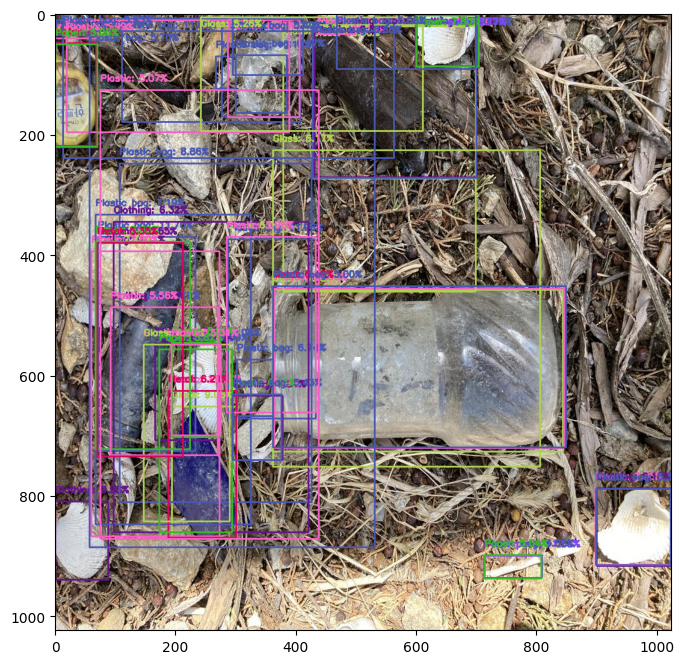

In [5]:
showBox(pred_df24)
# COLORS = np.random.uniform(0, 255, size=(len(LABEL_NAME), 3))
# COLORS2 = cm.rainbow(np.linspace(0,255,len(LABEL_NAME)))
# print(COLORS, COLORS2)

# import matplotlib as mpl
# cmap = mpl.colormaps['viridis'].colors

# for i in range(len(LABEL_NAME)):
#     plt.scatter([1], [i], c=COLORS[i])#cmap[i])    

In [ ]:
showBox(pred_df23)

In [ ]:
showBox(pred_df3)

In [ ]:
showBox(pred_df4)

In [ ]:
showBox(pred_df5)

In [ ]:
import json

# load ground truth
with open('./dataset/train.json', 'r') as outfile:
    train = (json.load(outfile))
    
print(train['images'][0]['file_name'], train['annotations'][0]['bbox'], train['annotations'][0]['category_id'])

In [ ]:
COLORS = np.random.uniform(0, 255, size=(len(LABEL_NAME), 3))
def showTBox(img, x1, y1, x2, y2, label):
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    y = y1 - 15 if y1 - 15 > 15 else y1 + 15
    label = "{}".format(str(LABEL_NAME[label]))
    cv2.putText(img, label, (x1, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)
    # cv2.putText(img, label, (x1, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, COLORS[label], 2)

    # cv2.rectangle(img, (startX, startY), (endX, endY), (255, 0, 0), 2)

for i in range(0,10):
    file_name = train['images'][i]['file_name']
    img_id = train['images'][i]['id']
    img = plt.imread('./dataset/'+file_name)
    print(type(img))
    print(cv2.__version__)
    # print(img_id)

    for i in range(len(train['annotations'])):
        # print(train['annotations'][i]['image_id'])
        if img_id == train['annotations'][i]['image_id']:
            x1 = int(train['annotations'][i]['bbox'][0])
            y1 = int(train['annotations'][i]['bbox'][1])
            w = int(train['annotations'][i]['bbox'][2])
            h = int(train['annotations'][i]['bbox'][3])

            label = train['annotations'][i]['category_id']
            showTBox(img, x1, y1, x1+w, y1+h, label)
    # showTBox(file_name, x1, y1, x2, y2, label)
    plt.figure(figsize=(8,8))
    plt.imshow(img)
    plt.show()
    # if i>10: break